In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [60]:
AIWFC_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Mariah Carey\Data\AIWFC_Data.csv")
Christ_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Mariah Carey\Data\Christmas_Data.csv")
MC_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Mariah Carey\Data\Mariah_Carey_Data.csv")
Memes_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Mariah Carey\Data\Memes_Data.csv")

In [61]:
# Checking dataframe out. All should be formated the same, same length etc. First two rows should be dropped
AIWFC_df.head()

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Week,All I Want For Christmas Is You: (United States)
2,11/11/2018,15
3,11/18/2018,19
4,11/25/2018,22


### Cleaning Data Frames

In [62]:
# Dropping first two rows: Caution - Only Run Once
AIWFC_df = AIWFC_df.drop(index=[0,1])
Christ_df = Christ_df.drop(index=[0,1])
MC_df = MC_df.drop(index=[0,1])
Memes_df = Memes_df.drop(index=[0,1])

In [63]:
AIWFC_df.rename(columns={'Category: All categories': 'Date', 'Unnamed: 1' : 'AIWFC'} , inplace=True)
Christ_df.rename(columns={'Category: All categories': 'Date', 'Unnamed: 1' : 'Christmas'} , inplace=True)
MC_df.rename(columns={'Category: All categories': 'Date', 'Unnamed: 1' : 'MariahCarey'} , inplace=True)
Memes_df.rename(columns={'Category: All categories': 'Date', 'Unnamed: 1' : 'Memes'} , inplace=True)

In [64]:
MC_df.head()

,Date,MariahCarey
2,11/11/2018,38
3,11/18/2018,52
4,11/25/2018,35
5,12/2/2018,36
6,12/9/2018,38


In [65]:
#merged_df = pd.merge(df1, df2, on='date')
#merged_df = pd.merge(merged_df, df3, on='date')
#merged_df = pd.merge(merged_df, df4, on='date')


merged_df = pd.merge(AIWFC_df, Christ_df, on='Date')
merged_df = pd.merge(merged_df, MC_df, on='Date')
merged_df = pd.merge(merged_df, Memes_df, on='Date')

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%Y')     # Making the date the correct format for plotting
merged_df = merged_df.set_index('Date')    # Making the index date. Can take this out if there are errors with plotting

In [66]:
merged_df.head() # Looks good.  

,AIWFC,Christmas,MariahCarey,Memes
Date,,,,
2018-11-11,15,25,38,80
2018-11-18,19,35,52,81
2018-11-25,22,49,35,85
2018-12-02,38,53,36,81
2018-12-09,42,52,38,89


Note: All variables are already normalized (0-100) with 0 being the lowest relevance, and 100 being the highest. Not much cleaning is necessary for a model.

In [67]:
print(merged_df.isna().sum())    # Zero missing values.

AIWFC          0
Christmas      0
MariahCarey    0
Memes          0
dtype: int64


### Plotting

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

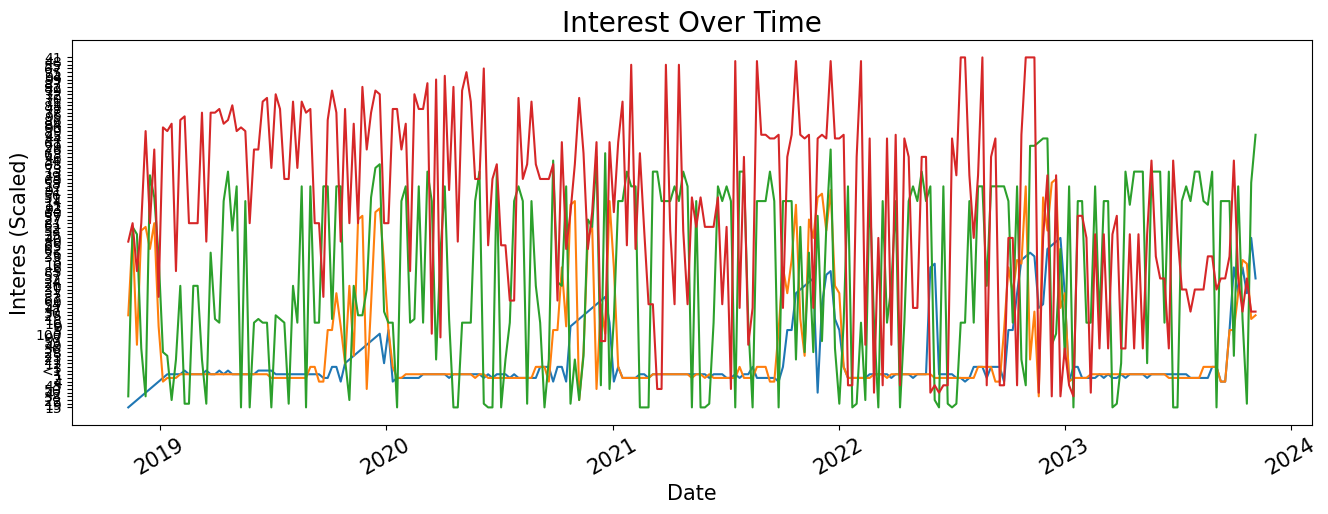

In [68]:
fig = plt.subplots(figsize=(16, 5)) # Plot dimensions (w x h)

for col in ['AIWFC', 'Christmas', 'MariahCarey', 'Memes']:
    plt.plot(merged_df.index, merged_df[col])
    
    
# Adding a plot title and customizing its font size
plt.title('Interest Over Time', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Interes (Scaled)', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)

In [74]:
merged_df.replace('<1', 0, inplace=True)
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

In [76]:
merged_df.to_csv('merged_data.csv', index=True)